# Chapter 6.3 - Pandas groupby

Pandas groupby can make it easy to perform statistics on relevant groupings of data. 

The groupby feature combines filtering, looping, and running statistics into one line. Your main job is to make sure you are using it correctly and to test it is working as you would expect.

<a href=https://pandas.pydata.org/docs/user_guide/groupby.html>Pandas groupby examples</a>

Download the dataset

In [1]:
!wget -nc "https://raw.githubusercontent.com/ahaberlie/python_programming_geosciences/refs/heads/main/data/1950-2024_actual_tornadoes.csv"

File ‘1950-2024_actual_tornadoes.csv’ already there; not retrieving.



### Chapter 6.3.1 - Grouping data in the SPC dataset

If we wanted to get statistics for each year, we might be tempted to use filtering:

In [2]:
import pandas as pd

tor = pd.read_csv("1950-2024_actual_tornadoes.csv")

# DO NOT DO THIS!
yr_1950 = tor[tor.yr==1950]
yr_1951 = tor[tor.yr==1951]

print("Count for 1950", len(yr_1950))
print("Count for 1951", len(yr_1951))

Count for 1950 201
Count for 1951 260


As you can imagine, if we try this on a dataset of 100s or 1000s of years, this will become overwhelmingly complicated.

Let's examine a better way with some example data:

In [3]:
test_data = {'month': [1, 1, 1, 4, 5, 8, 8, 10], 'data_value': [18.1, 9.1, 0.5, 1.0, 5.4, 9.0, 10.4, 9.5]}

df = pd.DataFrame.from_dict(test_data)

df

,month,data_value
0,1,18.1
1,1,9.1
2,1,0.5
3,4,1.0
4,5,5.4
5,8,9.0
6,8,10.4
7,10,9.5


If we wanted to find the mean ```data_value``` for each month, we could try and filter the data:

In [4]:
df[df.month==1]

,month,data_value
0,1,18.1
1,1,9.1
2,1,0.5


and then find the mean

In [5]:
df[df.month==1]['data_value'].mean()

np.float64(9.233333333333334)

and then repeat this for each month

In [6]:
print("Month 1 mean is", df[df.month==1]['data_value'].mean())
print("Month 4 mean is", df[df.month==4]['data_value'].mean())
print("Month 5 mean is", df[df.month==5]['data_value'].mean())
print("Month 8 mean is", df[df.month==8]['data_value'].mean())
print("Month 10 mean is", df[df.month==10]['data_value'].mean())

Month 1 mean is 9.233333333333334
Month 4 mean is 1.0
Month 5 mean is 5.4
Month 8 mean is 9.7
Month 10 mean is 9.5


we could even turn this into a loop

In [7]:
for month_int in df['month'].unique():

    condition = df.month==month_int

    df_filter = df[condition]

    mean_result = df_filter['data_value'].mean()

    print(f"The mean for month {month_int} is {mean_result:.2f}")

The mean for month 1 is 9.23
The mean for month 4 is 1.00
The mean for month 5 is 5.40
The mean for month 8 is 9.70
The mean for month 10 is 9.50


### ```groupby``` can do this all for you!

In [8]:
group_means = df.groupby('month').mean()

group_means

,data_value
month,
1,9.233333
4,1.000000
5,5.400000
8,9.700000
10,9.500000


### Chapter 6.3.2 - ```groupby``` statistics 

Consider a situation where you want to calculate statistics for sets of data that share the same value in a column.

You might (correctly) choose to use ```groupby``` for this, and loop through every year, for example, and print out the statistics. You would (correctly) use the 'yr' column in the ```groupby``` method. However, you might not know what to do next. 

You might try to loop through the ```groupby``` results and print out all of your sum and mean statistics for the subset columns:

In [9]:
for group_id, group_data in tor.groupby('yr'):

    print("tornado fatalities in", group_id, "=", group_data['fat'].sum())

for group_id, group_data in tor.groupby('yr'):

    print("Average month in", group_id, group_data['mo'].mean())

tornado fatalities in 1950 = 70
tornado fatalities in 1951 = 34
tornado fatalities in 1952 = 230
tornado fatalities in 1953 = 523
tornado fatalities in 1954 = 36
tornado fatalities in 1955 = 129
tornado fatalities in 1956 = 81
tornado fatalities in 1957 = 192
tornado fatalities in 1958 = 67
tornado fatalities in 1959 = 58
tornado fatalities in 1960 = 46
tornado fatalities in 1961 = 52
tornado fatalities in 1962 = 30
tornado fatalities in 1963 = 31
tornado fatalities in 1964 = 73
tornado fatalities in 1965 = 301
tornado fatalities in 1966 = 98
tornado fatalities in 1967 = 114
tornado fatalities in 1968 = 131
tornado fatalities in 1969 = 66
tornado fatalities in 1970 = 73
tornado fatalities in 1971 = 159
tornado fatalities in 1972 = 27
tornado fatalities in 1973 = 89
tornado fatalities in 1974 = 366
tornado fatalities in 1975 = 60
tornado fatalities in 1976 = 44
tornado fatalities in 1977 = 43
tornado fatalities in 1978 = 53
tornado fatalities in 1979 = 84
tornado fatalities in 1980 = 28

There are some situations where looping through the group results is useful. However, for basic statistics, there is a much easier way to do this.

We will use the ```split-apply-combine``` functionality of pandas which, generally, does the following:

1. ```split```: break the data up into subsets based on some shared value in a column (years, months, etc.)
   > filtering the data for each unique value, example: ```df[df.yr==year]```
3. ```apply```: call a method for each subset to get results for subsets instead of the entire dataset (averages per year, counts per month, etc.)
   > running a method on each subset for each unique value, example: ```df[df.yr==year].mean()```
5. ```combine```: take the results from each subset and recombine them into a new DataFrame for the users (averages for all years, counts for all months, etc.)
   > combining the results of the method applied to each subset for each unique value, example: ```pd.concat(results) #results is a list of results```

The general method for accessing this functionality is included and handled for you in [```groupby```](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

This performs comparisons, loops through different subsets, calls functions, and merges the results *for you* so you do not have to worry about it. I *strongly* urge you to learn how to use this, as it will make your life *much* easier when working with large datasets. If you find yourself using a loop, running comparisons, or other tasks, as yourself if ```groupby``` could be used instead.

**Examples:**

We know that you can find statistics on columns:

In [10]:
tor['mag'].max()

np.int64(5)

We saw in the previous code example one way we could go about getting the maximum magnitude per yearly subsets. But there is a better way!

Since ```groupby``` just gives you subsets / smaller DataFrames that all share a value for a particular column (e.g., all have the same 'yr'), we can apply the statistics methods like we would on an individual column. 

We will plot this visualize the results of the "chaining" of methods. 

The interpretation of the results below is that some years have F/EF5, most years have at least an F/EF4, and one year only had a maximum rating of F/EF3.

Text(0.5, 0, 'year')

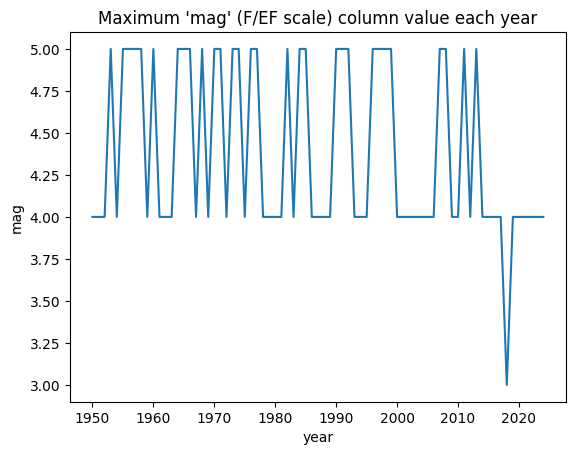

In [11]:
import matplotlib.pyplot as plt

grouped_years = tor.groupby('yr')

max_year = grouped_years.max()

plt.plot(max_year.index, max_year['mag'])
plt.title("Maximum 'mag' (F/EF scale) column value each year")
plt.ylabel("mag")
plt.xlabel("year")

**You can do this in one line!**

Text(0.5, 0, 'year')

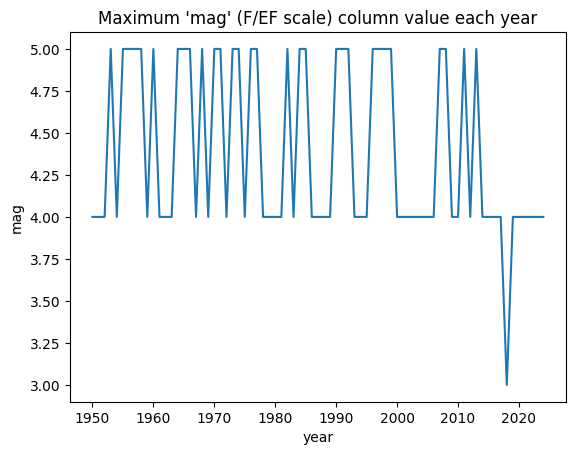

In [12]:
max_year = tor.groupby('yr').max()

plt.plot(max_year.index, max_year['mag'])
plt.title("Maximum 'mag' (F/EF scale) column value each year")
plt.ylabel("mag")
plt.xlabel("year")

Here is the general pattern for ```groupby``` statistics:

```
dataframe_name.groupby('column_name').statistic_method_name()
```

#### Common statistics:

1. **```size```**: get the count of rows in each group

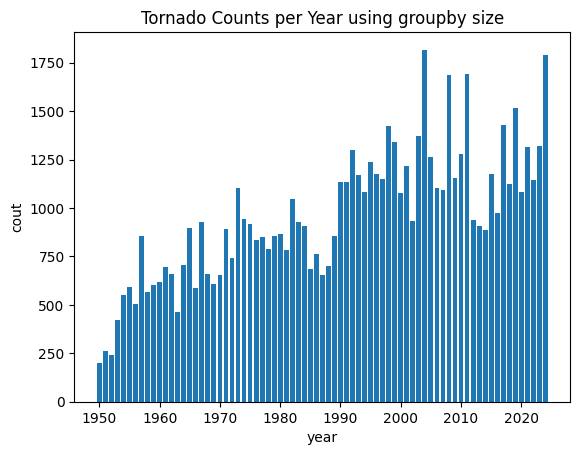

In [13]:
import matplotlib.pyplot as plt

yr_counts = tor.groupby('yr').size()

plt.bar(yr_counts.index, yr_counts)

plt.title("Tornado Counts per Year using groupby size")
plt.ylabel("cout")
plt.xlabel("year")
plt.show()

2. **```sum```**: get the sum column values for each group

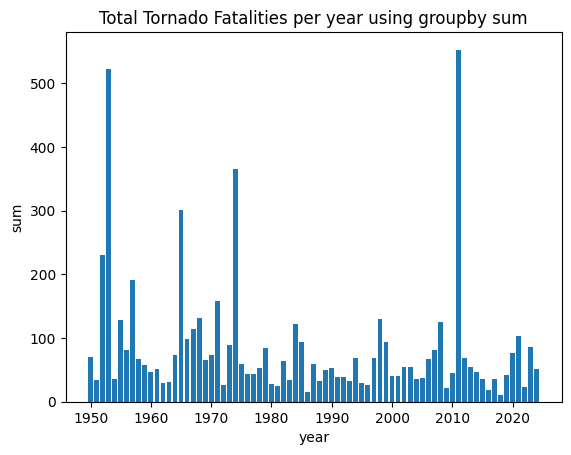

In [14]:
yr_sums = tor.groupby('yr').sum()

plt.bar(yr_sums.index, yr_sums['fat'])

plt.title("Total Tornado Fatalities per year using groupby sum")
plt.ylabel("sum")
plt.xlabel("year")
plt.show()

3. **```mean```**: get the mean column values for each group

You would want to subset the columns first to avoid getting an error.

In this code, we first get only the 'yr' and 'fat' columns in a subset before we run statistics:

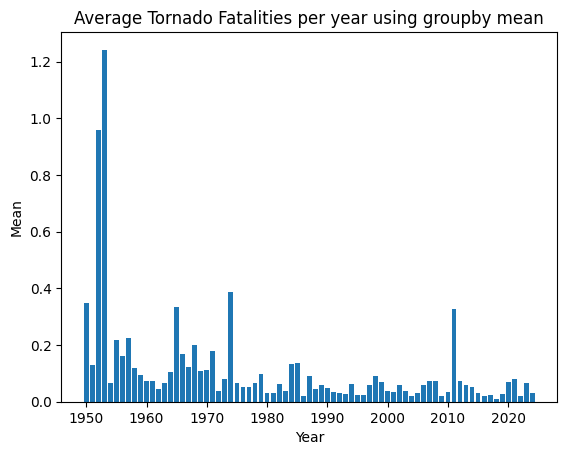

In [15]:
yr_means = tor[['yr', 'fat']]
yr_means = yr_means.groupby('yr').mean()

plt.bar(yr_means.index, yr_means['fat'])

plt.title("Average Tornado Fatalities per year using groupby mean")
plt.ylabel("Mean")
plt.xlabel("Year")
plt.show()

### Chapter 6.3.3 - Hurricane dataset (HURDAT2)

Get the dataset

In [16]:
!wget -nc https://raw.githubusercontent.com/ahaberlie/python_programming_geosciences/refs/heads/main/data/1950-2024_hurdat2.csv

File ‘1950-2024_hurdat2.csv’ already there; not retrieving.



Since this is a dataset many of us have never used before, we should read in the dataset and examine some basic information about it.

In [17]:
## index_col sets that column name to the index
hur = pd.read_csv("1950-2024_hurdat2.csv")

hur.columns

Index(['storm_id', 'storm_name', 'datetime', 'year', 'month', 'day', 'hour',
       'record_id', 'status', 'lat', 'lon', 'max_wind_kt', 'min_slp_mb'],
      dtype='object')

In [18]:
hur

,storm_id,storm_name,datetime,year,month,day,hour,record_id,status,lat,lon,max_wind_kt,min_slp_mb
0,AL011950,ABLE,1950-08-12 00:00:00,1950,8,12,0,NaN,TS,17.1,-55.5,35,-999
1,AL011950,ABLE,1950-08-12 06:00:00,1950,8,12,6,NaN,TS,17.7,-56.3,40,-999
2,AL011950,ABLE,1950-08-12 12:00:00,1950,8,12,12,NaN,TS,18.2,-57.4,45,-999
3,AL011950,ABLE,1950-08-12 18:00:00,1950,8,12,18,NaN,TS,19.0,-58.6,50,-999
4,AL011950,ABLE,1950-08-13 00:00:00,1950,8,13,0,NaN,TS,20.0,-60.0,50,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33348,AL192024,SARA,2024-11-17 06:00:00,2024,11,17,6,NaN,TS,16.5,-87.5,35,1001
33349,AL192024,SARA,2024-11-17 12:00:00,2024,11,17,12,NaN,TS,16.8,-87.9,35,1001
33350,AL192024,SARA,2024-11-17 14:00:00,2024,11,17,14,L,TS,17.0,-88.3,35,1001
33351,AL192024,SARA,2024-11-17 18:00:00,2024,11,17,18,NaN,TD,17.4,-89.1,30,1003


For this course, we will use a pre-processed, simplified version of this dataset from 1950 - 2024.

Unlike the tornado dataset, each storm can have many rows associated with it. For any one storm, observations, times, and positions are recorded. When you combine these for a storm, you call it the "storm track". for example, we can follow the position from, say, the eastern Atlantic to Florida, with 6 hour updates along the track.

The column metadata are as follows:

```storm_id```: the unique identifier for each individual storm track within the dataset.

```storm_name```: Storm name (if available). This is *not* unique in the dataset. Some names are recycled many times from year to year. However, in each year, the name is only used once.

```datetime```: The date and time of the specific observation within the track. Usually every 6-hours along the track.

```year```, ```month```, ```day```, ```hour```: The year, month, day, and hour of the specific observation within the track.

```lat```: The latitude at which the storm was centered at the observation time

```lon```: The longitude at which the storm was centered at the observation time

```max_wind_kt```: The maximum sustained winds at the observation time in knots

```min_slp_mb```: The minimum sea level pressure at the observation time in millibars


We can calculate per storm statistics by using a unique identifier.

Why will 'storm_name' work for one season, but not for many seasons?

Group by storm name and find the count of unique column values in each storm name's subset and then sort in descending order by the 'year' column to get the top reused names in the dataset:

In [19]:
years = hur.groupby('storm_name').nunique()

years.sort_values(by='year', ascending=False)

,storm_id,datetime,year,month,day,hour,record_id,status,lat,lon,max_wind_kt,min_slp_mb
storm_name,,,,,,,,,,,,
UNNAMED,310,4626,58,11,31,18,2,9,456,829,17,48
ARLENE,12,341,12,6,31,11,2,6,197,263,19,39
FLORENCE,10,330,10,3,29,9,2,8,197,261,24,63
CINDY,10,232,10,4,29,10,1,7,175,199,17,35
DOLLY,9,200,9,4,27,10,3,7,145,166,14,32
...,...,...,...,...,...,...,...,...,...,...,...,...
STAN,1,17,1,1,5,5,1,3,14,17,9,10
TANYA,1,29,1,2,8,4,0,4,27,26,10,22
TEDDY,1,49,1,1,13,4,0,4,46,44,18,33


Find the maximum wind speed for each unique storm (by ```storm_id```) and sort in descending order by 'max_wind_kt' to get the top wind speeds for each storm. First, subset the statistics only for ```storm_id```, ```year```, ```storm_name``` and ```max_wind_kts```:

In [20]:
max_values = hur[['max_wind_kt', 'storm_name', 'year', 'storm_id']]
max_values = max_values.groupby('storm_id').max()

max_values.sort_values(by='max_wind_kt', ascending=False)

,max_wind_kt,storm_name,year
storm_id,,,
AL041980,165,ALLEN,1980
AL081988,160,GILBERT,1988
AL252005,160,WILMA,2005
AL052019,160,DORIAN,2019
AL131998,155,MITCH,1998
...,...,...,...
AL091972,25,UNNAMED,1972
AL212023,25,TWENTY-ONE,2023
AL221975,25,UNNAMED,1975


# Try it yourself

Group the hurricane data by "storm_id" and print the name of each group

Create a new column named 'SS Scale' and figure out a way to use the ```max_wind_kt``` to calculate categories from this: https://en.wikipedia.org/wiki/Saffir%E2%80%93Simpson_scale

Group the hurricane data by month (df.month) and count the number of unique storms.

Plot the "tracks" of storms that reached at least category 1 in your 'SS Scale' column.

In [21]:
import matplotlib.pyplot as plt